In [14]:
import xarray as xr
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
ls /glade/u/home/abukowski/scratch/paper1/postproc/ ; ls ~/paper1-reruns/

disturbed_edensity_SAMI-REGRID.nc  quiet_edensity_SAMI-REGRID.nc
disturbed_GITM.nc                  quiet_GITM.nc
disturbed_SAMI-RAW.nc              quiet_SAMI-RAW.nc
disturbed_SAMI-REGRID.nc           quiet_SAMI-REGRID.nc
dist_default_maxalt2000_SAMI-REGRID.nc	quiet
dist_default_maxalt2200_SAMI-REGRID.nc	quiet_default_maxalt2000_SAMI-REGRID.nc
disturbed				quiet_default_maxalt2200_SAMI-REGRID.nc
Paper1_Response_plots.ipynb		run_gitm.sh
plots


In [12]:
dist22 = xr.open_mfdataset('~/paper1-reruns/dist_default_maxalt2200_SAMI-REGRID.nc', engine='h5netcdf')
dist20 = xr.open_mfdataset('~/paper1-reruns/dist_default_maxalt2000_SAMI-REGRID.nc', engine='h5netcdf')
dist0  = xr.open_mfdataset('/glade/u/home/abukowski/scratch/paper1/postproc/disturbed_edensity_SAMI-REGRID.nc', engine='h5netcdf')

quiet22 = xr.open_mfdataset('~/paper1-reruns/quiet_default_maxalt2200_SAMI-REGRID.nc', engine='h5netcdf')
quiet20 = xr.open_mfdataset('~/paper1-reruns/quiet_default_maxalt2000_SAMI-REGRID.nc', engine='h5netcdf')
quiet0  = xr.open_mfdataset('/glade/u/home/abukowski/scratch/paper1/postproc/quiet_edensity_SAMI-REGRID.nc', engine='h5netcdf')

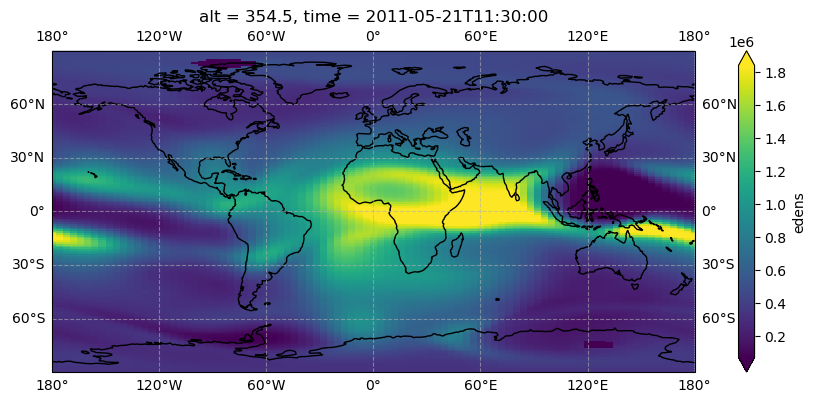

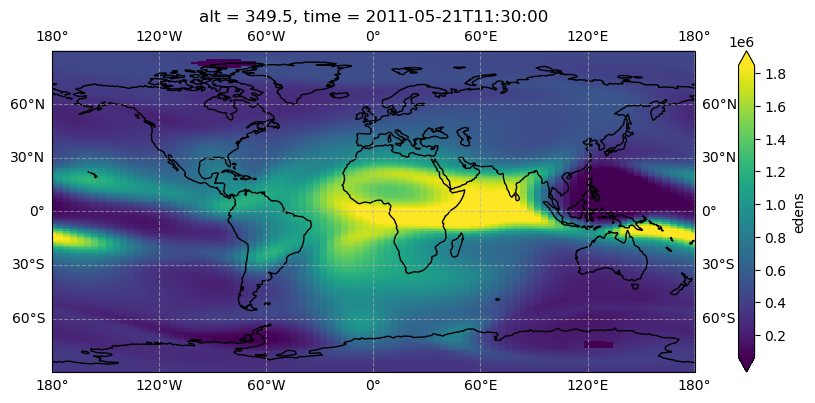

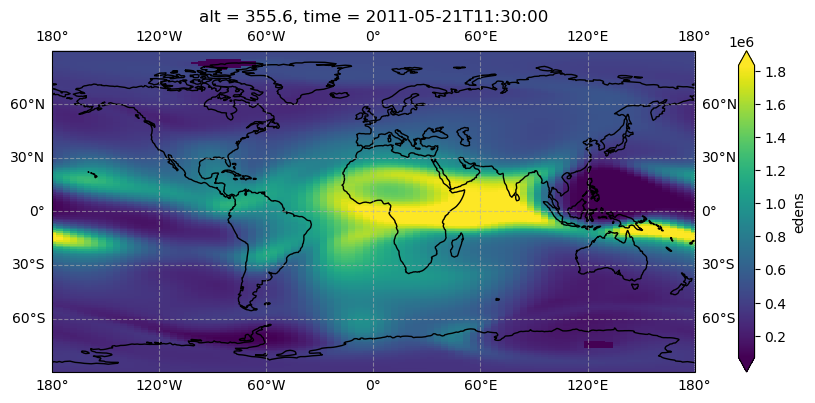

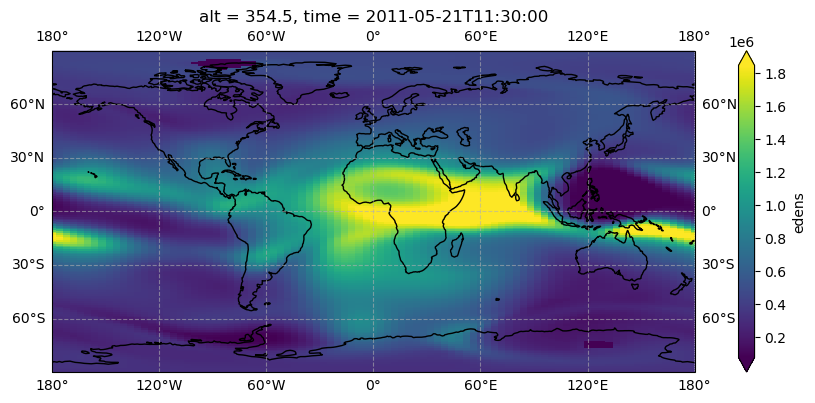

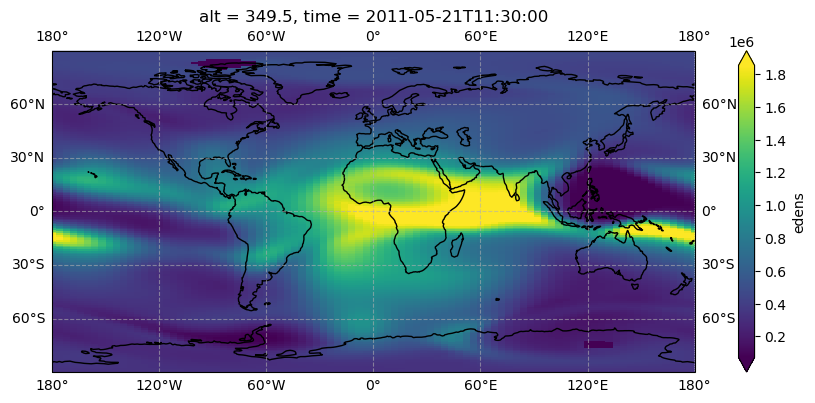

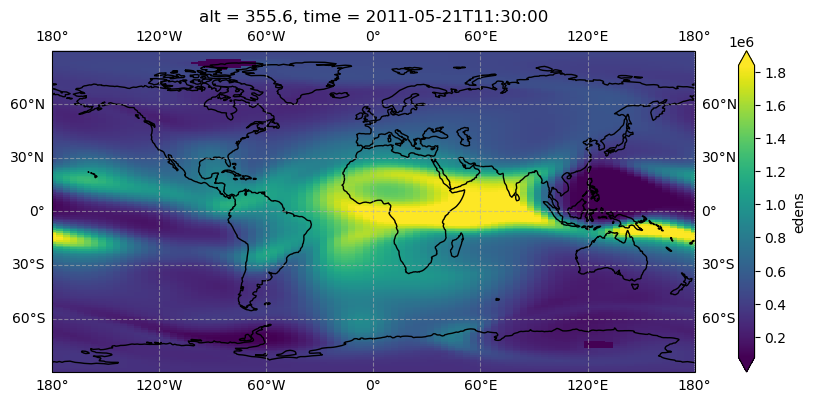

In [28]:
t = '20110521 11:30'
alt = 350


for ds in [dist22, dist20, dist0, quiet22, quiet20, quiet0]:
    
    fig = plt.figure(figsize=(9.5,4))
    ax = fig.add_subplot(projection=ccrs.PlateCarree())
    ds.sel(time=t, alt=alt, method='nearest').edens.plot(x='lon', robust=True, ax=ax, transform=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(linestyle='--', alpha=.6, draw_labels=True)
    # ax.
    fig.tight_layout()
    fig.show()
    # break

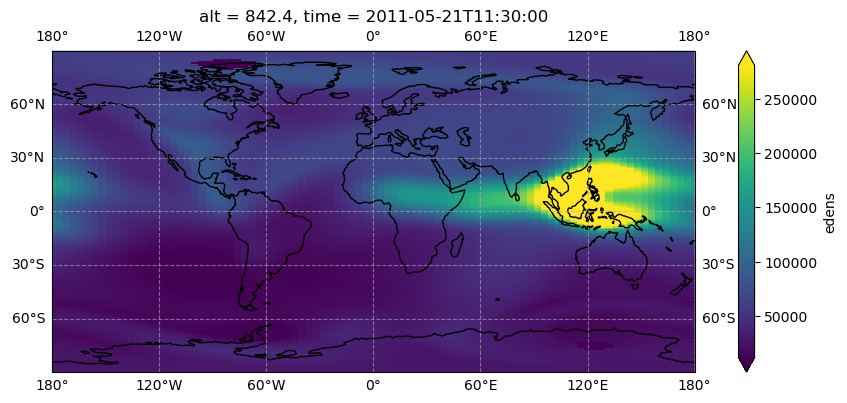

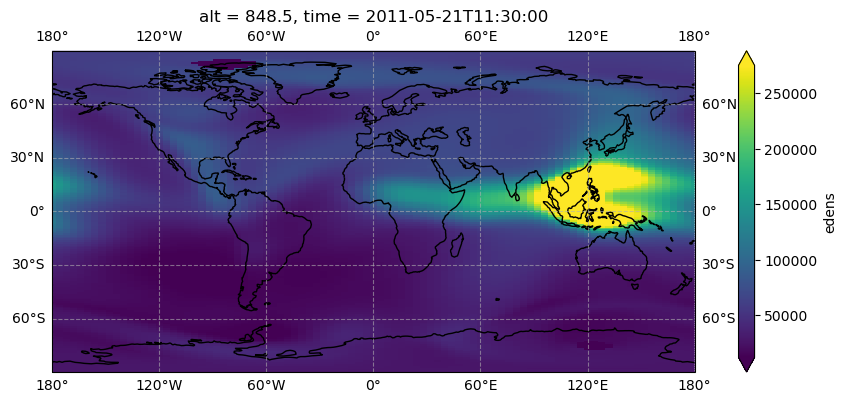

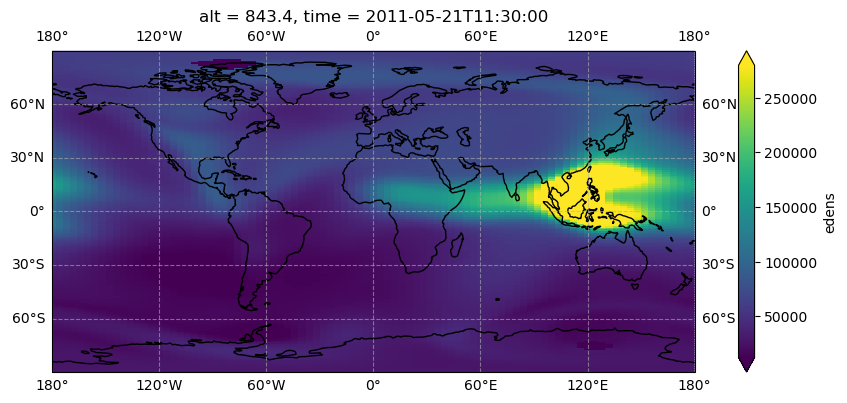

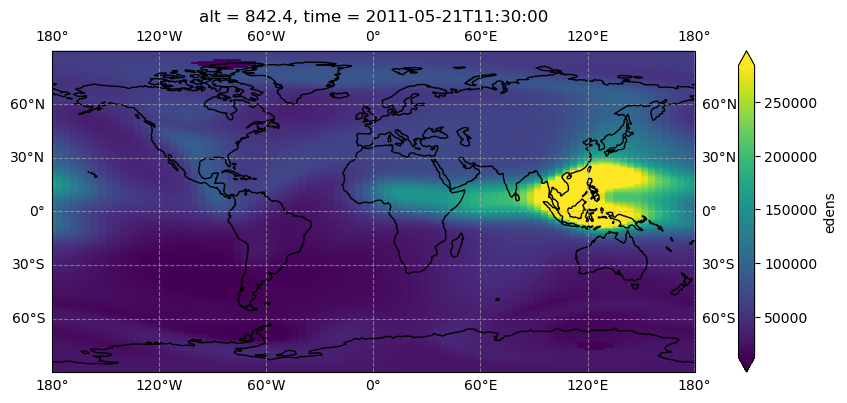

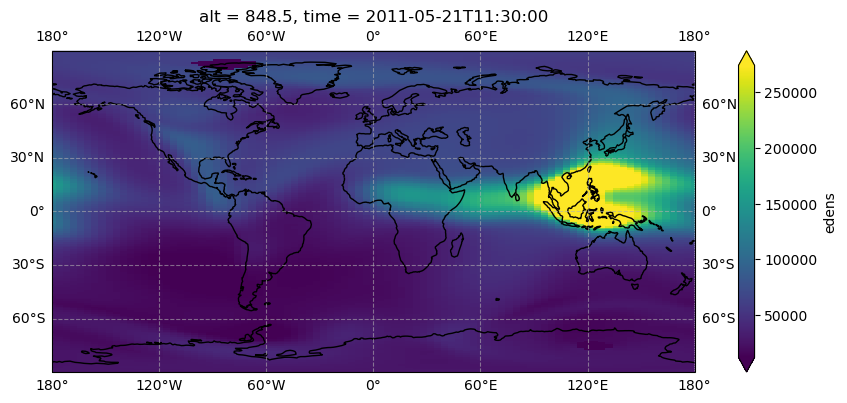

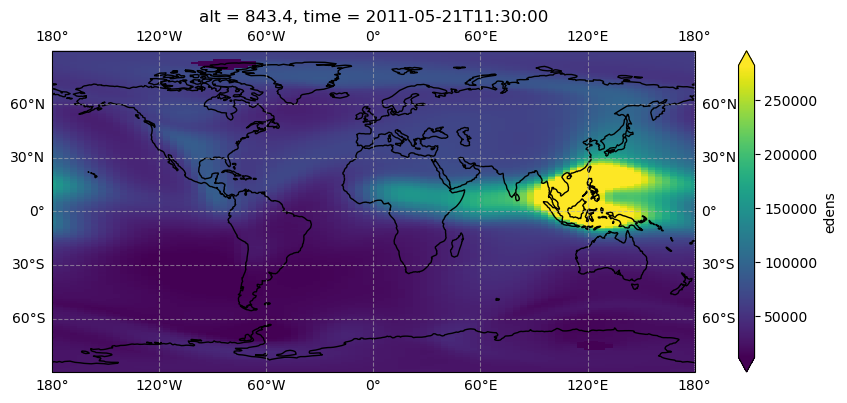

In [29]:
t = '20110521 11:30'
alt = 840


for ds in [dist22, dist20, dist0, quiet22, quiet20, quiet0]:
    
    fig = plt.figure(figsize=(9.5,4))
    ax = fig.add_subplot(projection=ccrs.PlateCarree())
    ds.sel(time=t, alt=alt, method='nearest').edens.plot(x='lon', robust=True, ax=ax, transform=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(linestyle='--', alpha=.6, draw_labels=True)
    # ax.
    fig.tight_layout()
    fig.show()
    # break

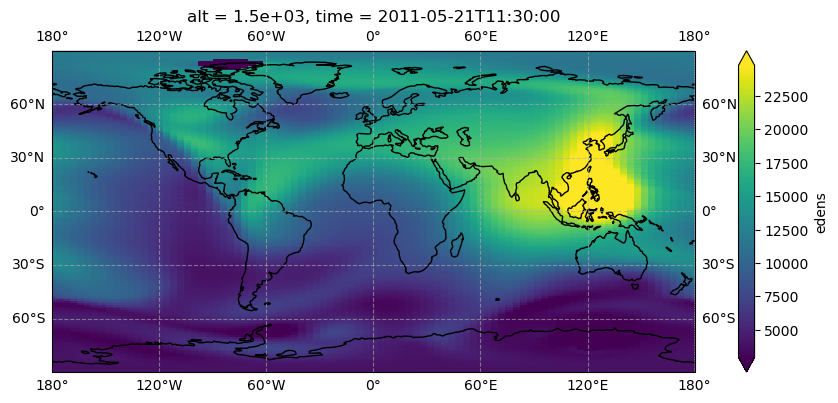

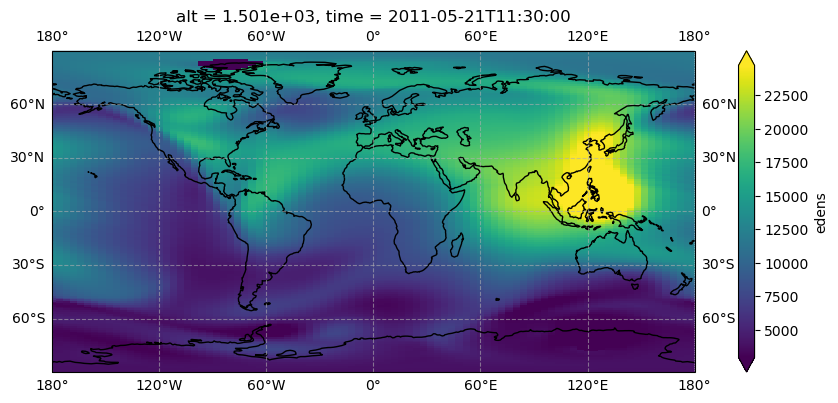

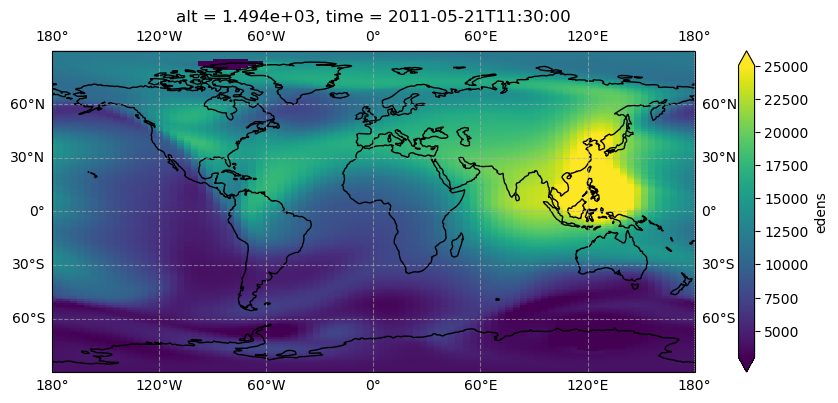

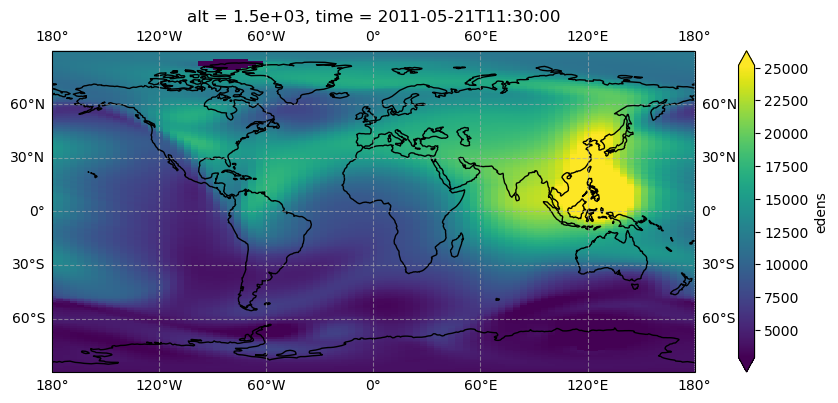

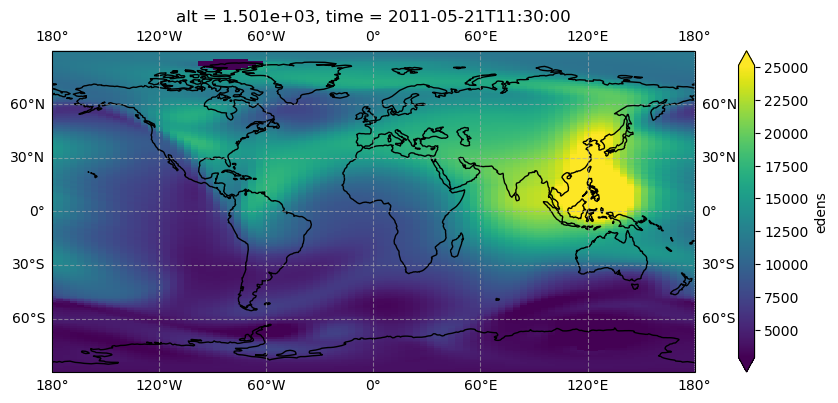

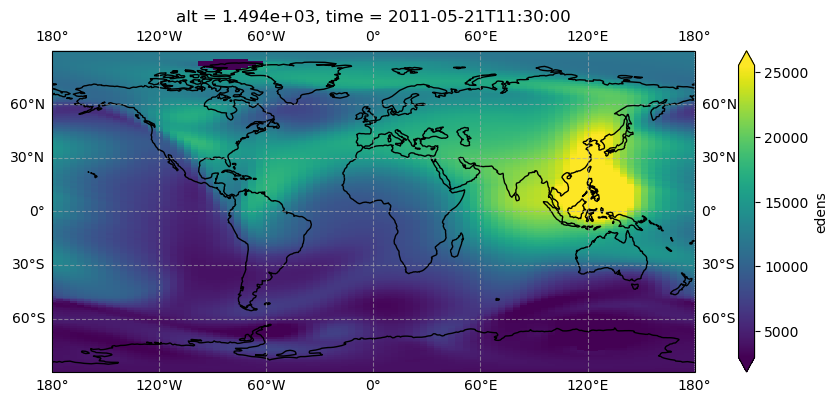

In [30]:
t = '20110521 11:30'
alt = 1500


for ds in [dist22, dist20, dist0, quiet22, quiet20, quiet0]:
    
    fig = plt.figure(figsize=(9.5,4))
    ax = fig.add_subplot(projection=ccrs.PlateCarree())
    ds.sel(time=t, alt=alt, method='nearest').edens.plot(x='lon', robust=True, ax=ax, transform=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(linestyle='--', alpha=.6, draw_labels=True)
    # ax.
    fig.tight_layout()
    fig.show()
    # break

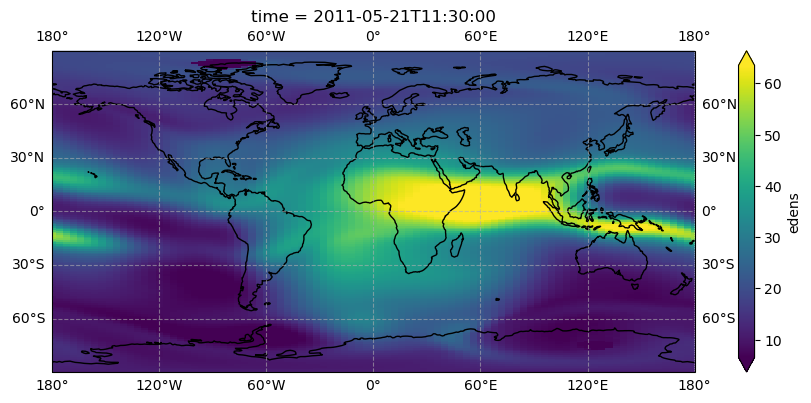

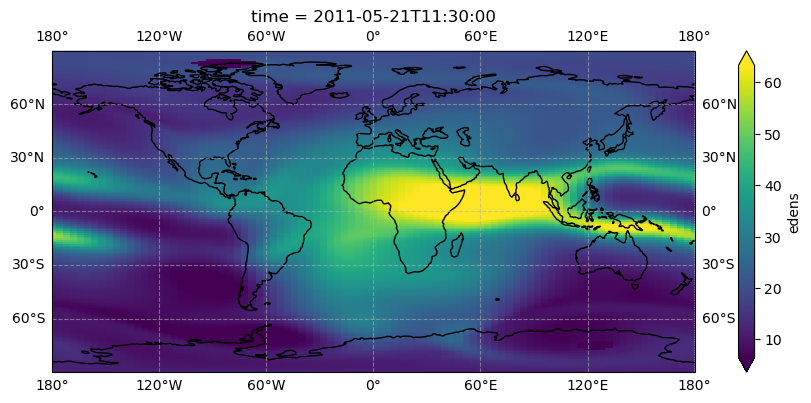

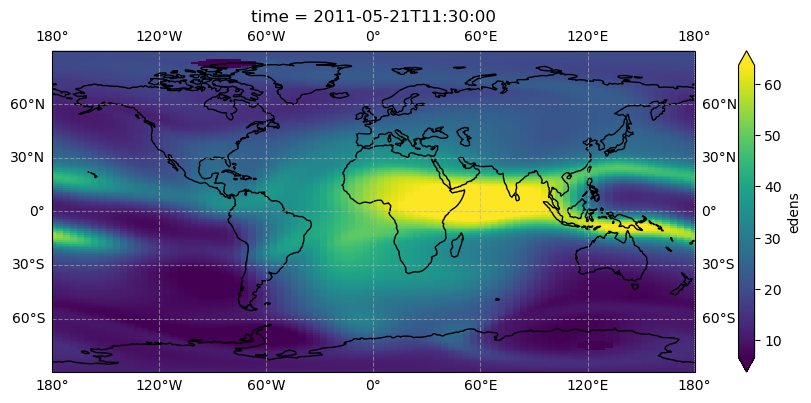

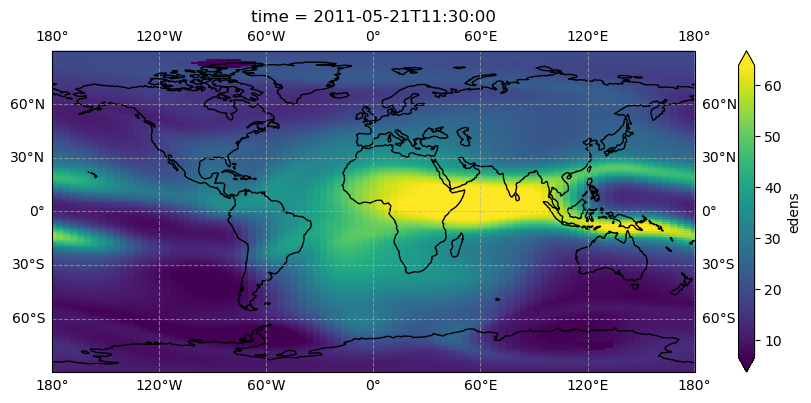

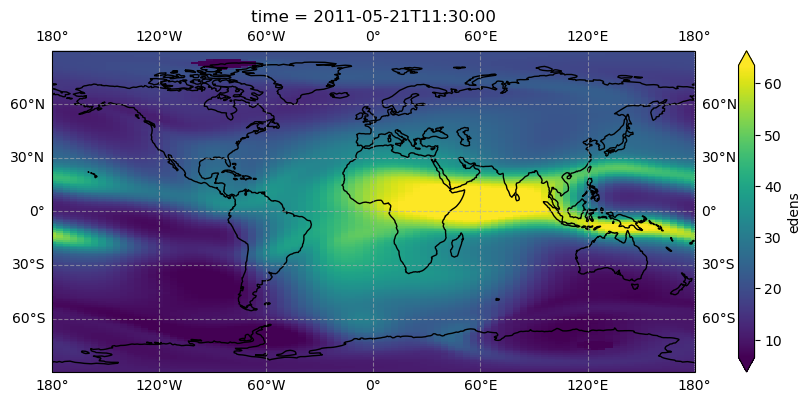

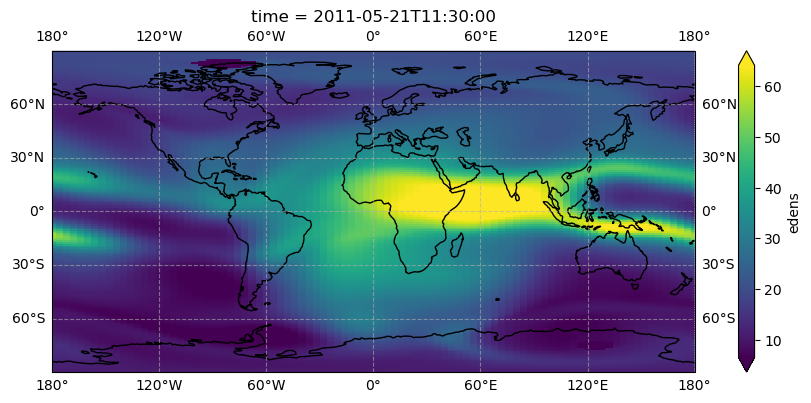

In [31]:
t = '20110521 11:30'
alt = -1


for ds in [dist22, dist20, dist0, quiet22, quiet20, quiet0]:
    
    fig = plt.figure(figsize=(9.5,4))
    ax = fig.add_subplot(projection=ccrs.PlateCarree())
    (ds.sel(time=t, method='nearest').edens.integrate('alt')/1e7).plot(x='lon', robust=True, ax=ax, transform=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(linestyle='--', alpha=.6, draw_labels=True)
    # ax.
    fig.tight_layout()
    fig.show()
    # break

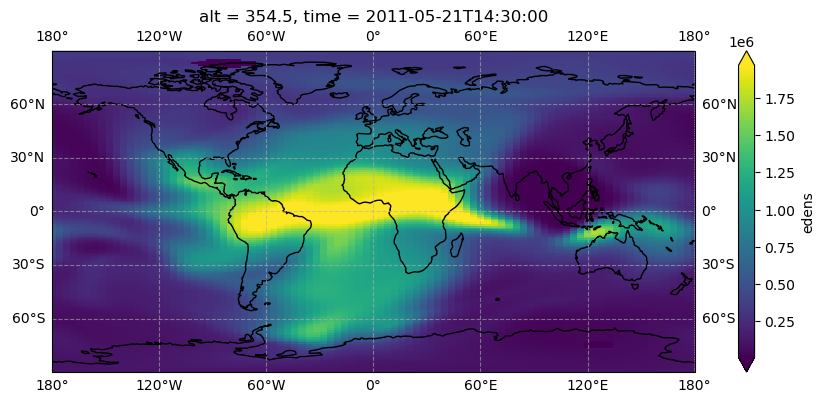

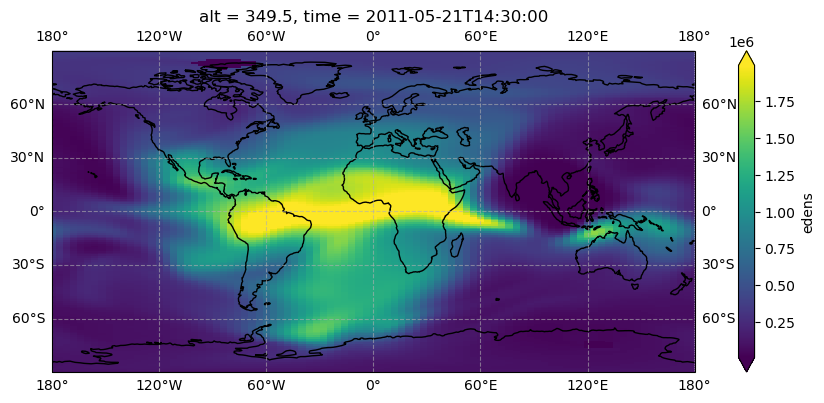

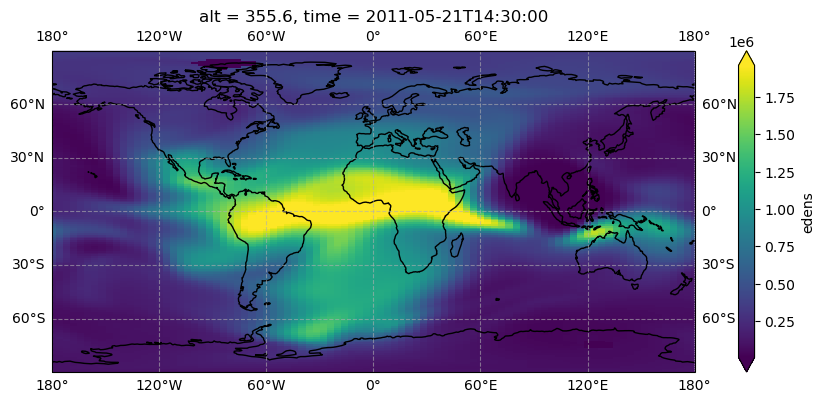

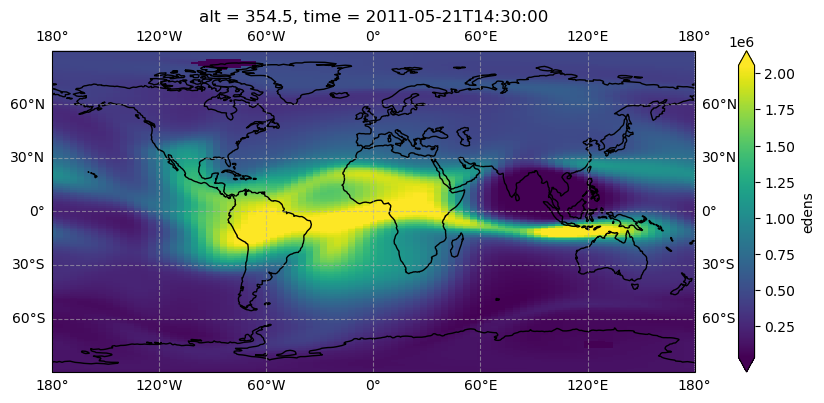

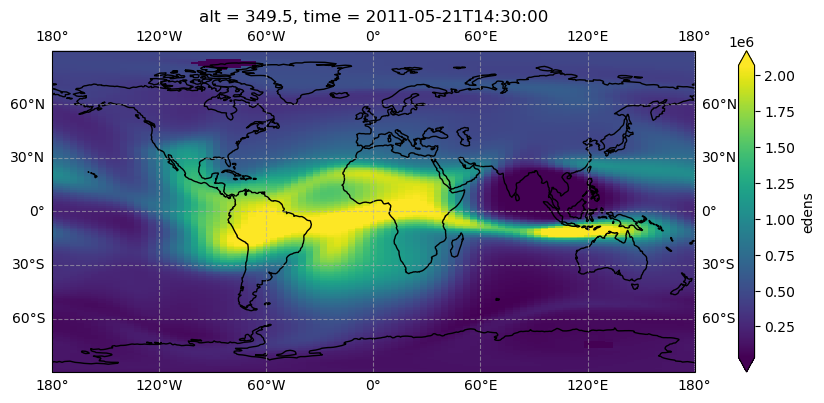

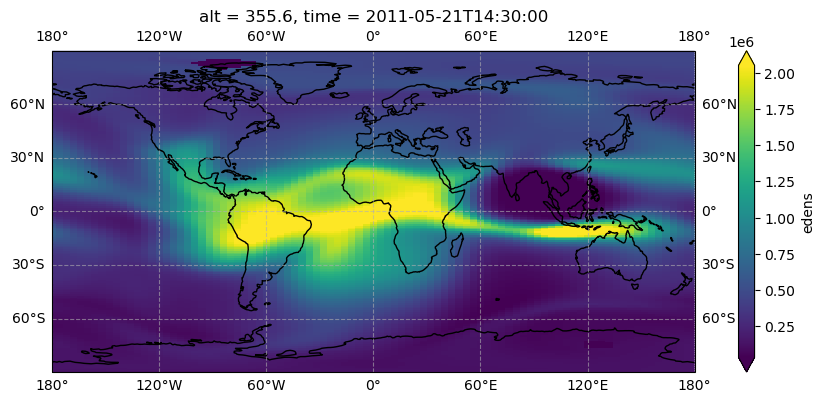

In [32]:
t = '20110521 14:30'
alt = 350


for ds in [dist22, dist20, dist0, quiet22, quiet20, quiet0]:
    
    fig = plt.figure(figsize=(9.5,4))
    ax = fig.add_subplot(projection=ccrs.PlateCarree())
    ds.sel(time=t, alt=alt, method='nearest').edens.plot(x='lon', robust=True, ax=ax, transform=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(linestyle='--', alpha=.6, draw_labels=True)
    # ax.
    fig.tight_layout()
    fig.show()
    # break

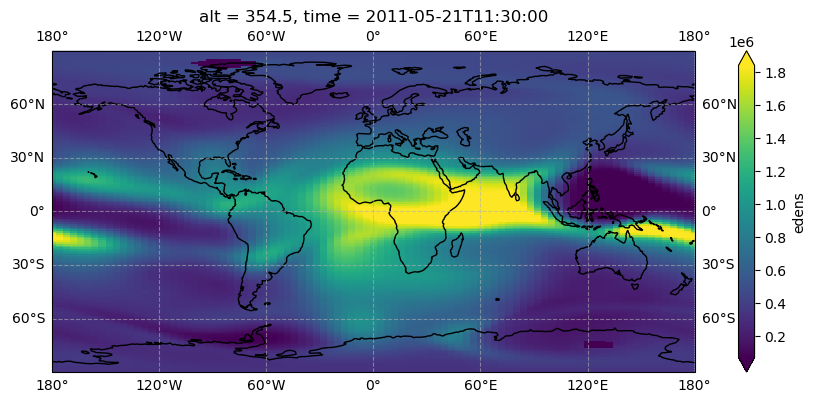

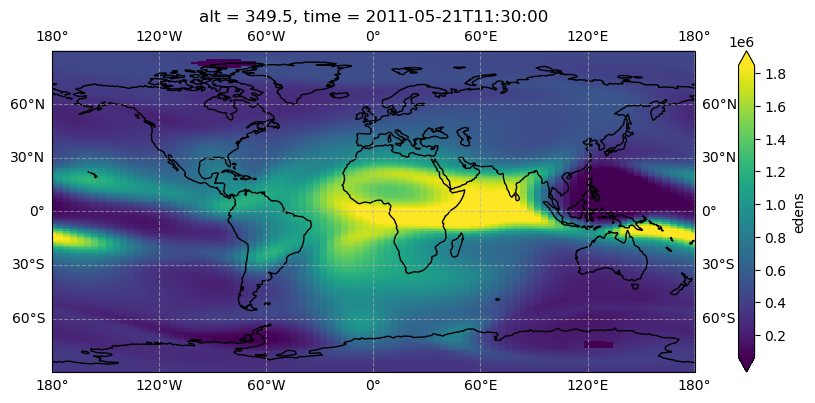

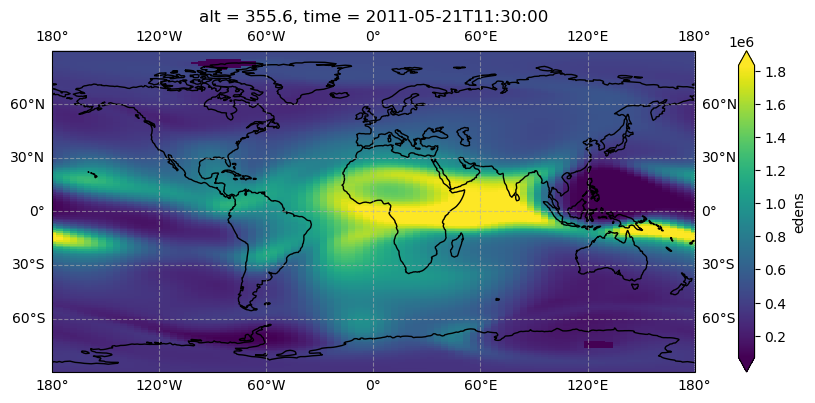

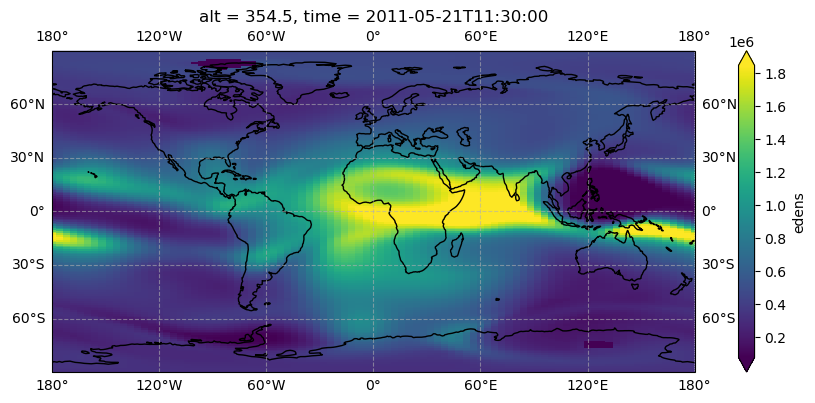

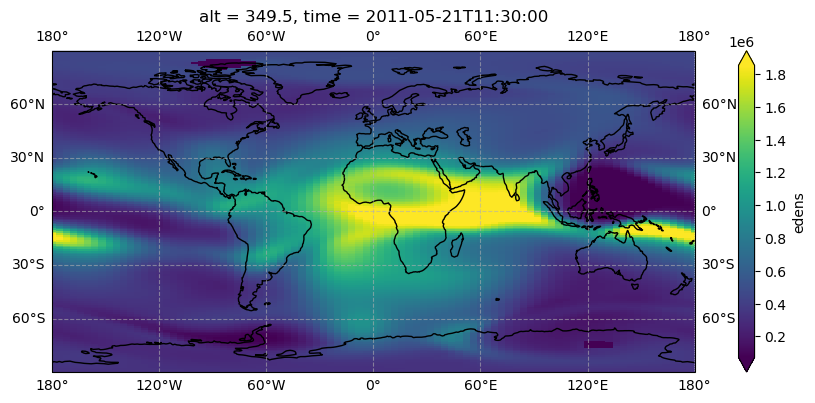

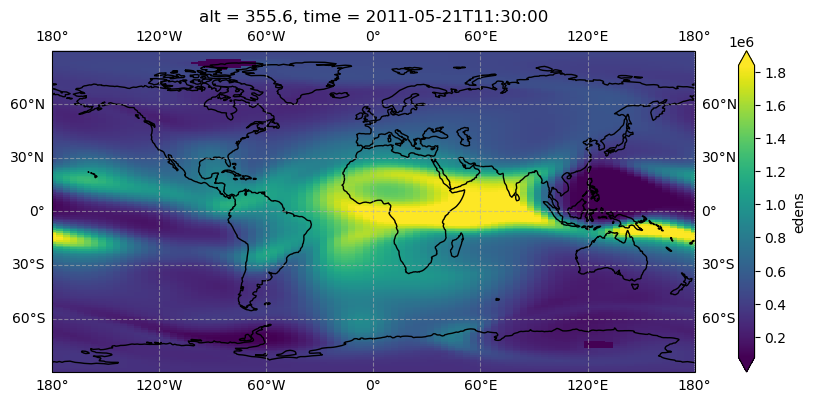

In [28]:
t = ['20110521 11:30', '20110521 14:30']
alt = 350


for ds in [dist22, dist20, dist0, quiet22, quiet20, quiet0]:
    
    fig = plt.figure(figsize=(9.5,4))
    ax = fig.add_subplot(projection=ccrs.PlateCarree())
    ds.sel(time=t, alt=alt, method='nearest').edens.plot(x='lon', robust=True, ax=ax, transform=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(linestyle='--', alpha=.6, draw_labels=True)
    # ax.
    fig.tight_layout()
    fig.show()
    # break

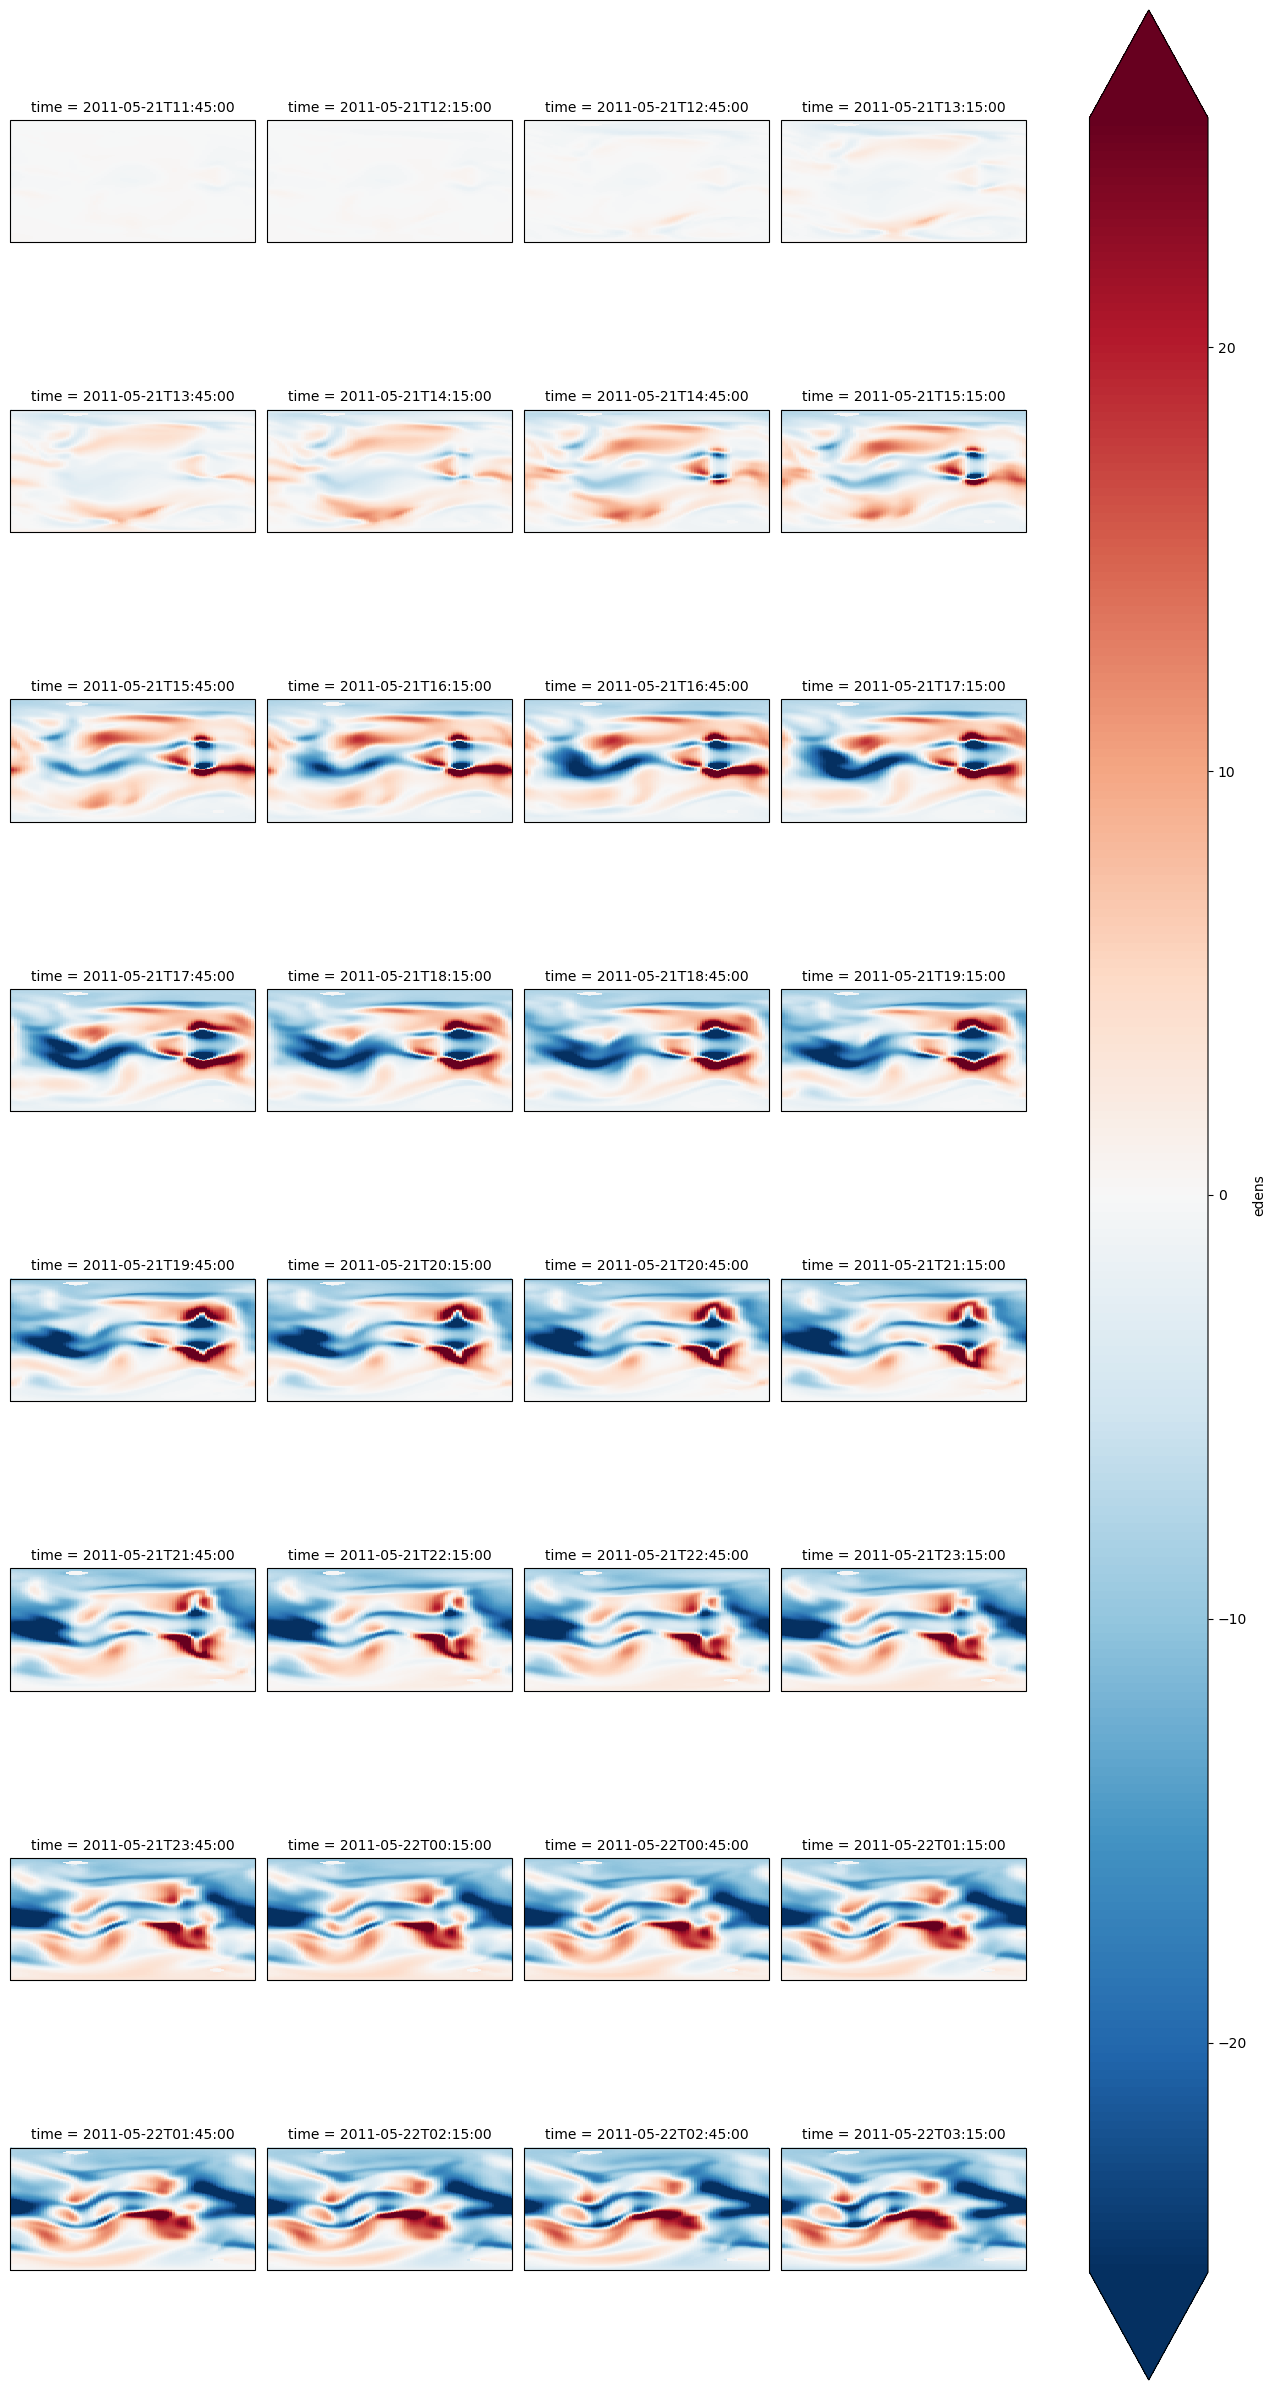

In [61]:
t = [pd.Timestamp('20110521 11:45') + i*pd.Timedelta('30 minutes') for i in range(32)]



((dist20 - quiet20).sel(time=t, method='nearest').integrate('alt')/1e7).edens.plot(col='time', x='lon', 
                                                                                   col_wrap=4, 
                                                                                   subplot_kws={'projection':ccrs.PlateCarree()}, 
                                                                                   transform=ccrs.PlateCarree(),
                                                                                  robust=True)




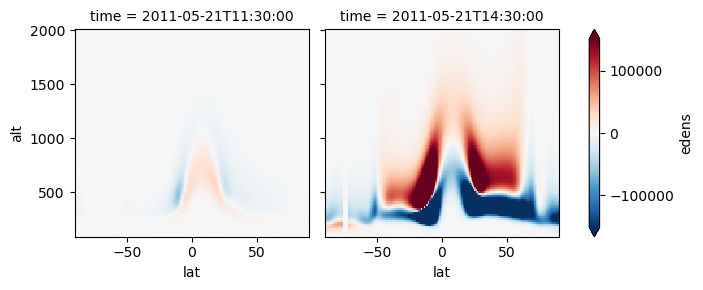

In [45]:
((dist20 - quiet20).sel(time=t, method='nearest').sel(lon=120, method='nearest')).edens.plot(col='time', x='lat', robust=True)

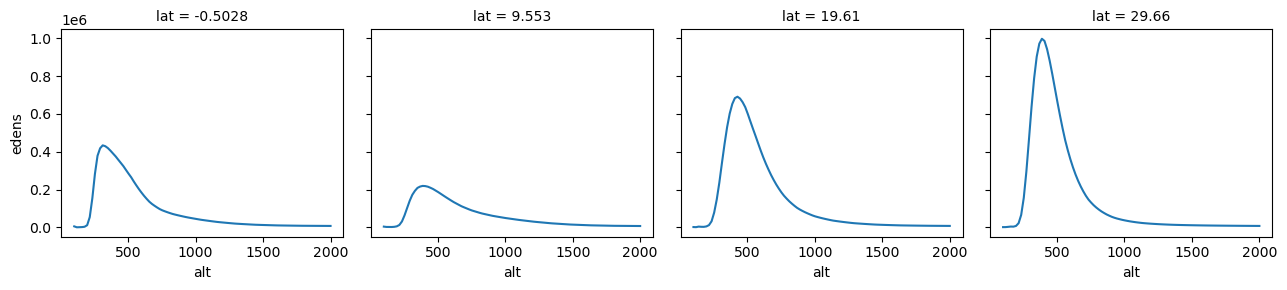

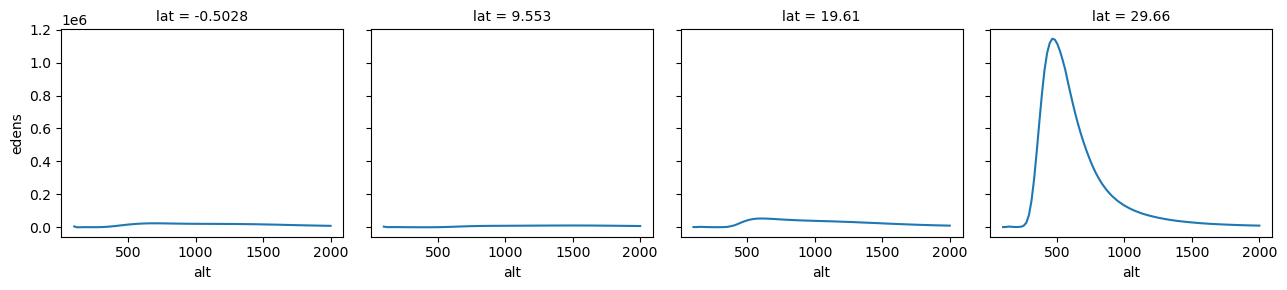

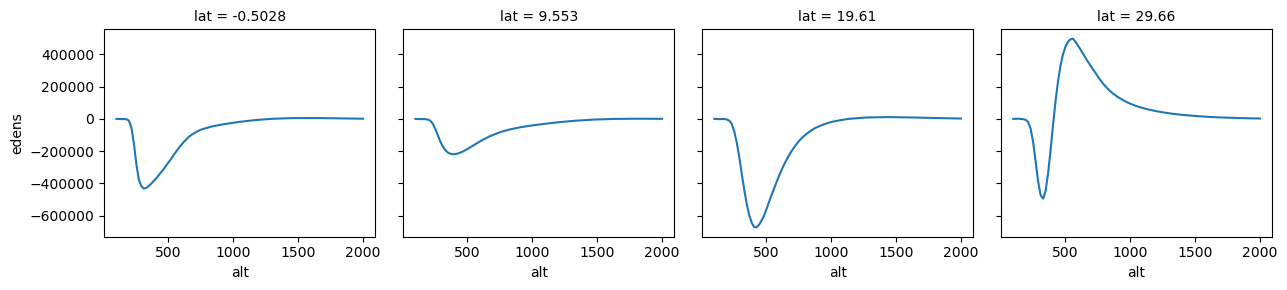

In [60]:
(quiet20).sel(time=t[-1], method='nearest').sel(lon=120, lat=[0,10,20,30], method='nearest').edens.plot(col='lat')
(dist20).sel(time=t[-1], method='nearest').sel(lon=120, lat=[0,10,20,30], method='nearest').edens.plot(col='lat')
(dist20-quiet20).sel(time=t[-1], method='nearest').sel(lon=120, lat=[0,10,20,30], method='nearest').edens.plot(col='lat')